In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import comb
import math


In [5]:
a = np.array([[1,2,3],[4,5,6]])

print(a)
print(a.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [10]:
b_1D = np.array([[1,2,3,4,5,6]])
c_2D = np.reshape(b_1D, (2,3))
print(c_2D)

[[1 2 3]
 [4 5 6]]


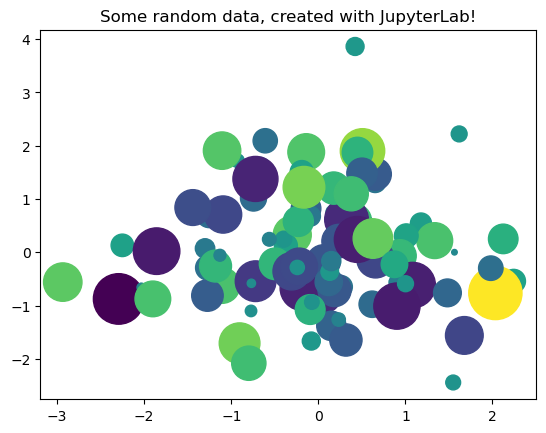

In [13]:
# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

# Array, Functions and simple plot

In [3]:
x = np.linspace(-10, 10, 5)
y = np.sin(x)
print(x,y)

[-10.  -5.   0.   5.  10.] [ 0.54402111  0.95892427  0.         -0.95892427 -0.54402111]


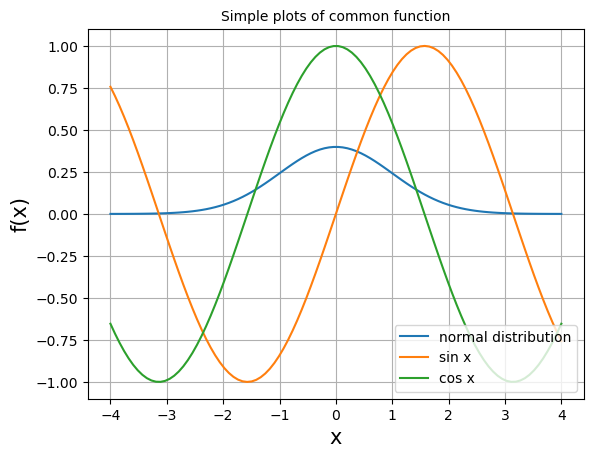

In [23]:
#defining an array for our x data
x = np.linspace(-4, 4, 100)

#evaluate the data using normal distribution from scipy(mean, standard deviation)
mu = 0
std = 1
y = stats.norm.pdf(x, mu, std)
#plot data
plt.plot(x, y, label="normal distribution")
plt.plot(x, np.sin(x), label="sin x")
plt.plot(x, np.cos(x), label = "cos x")

#plot labels and style
plt.title("Simple plots of common function", fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("x",fontsize=15)
plt.ylabel("f(x)", fontsize=15)
#changing the font size of the ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#show
plt.grid()
plt.show()

# Histogram

1000


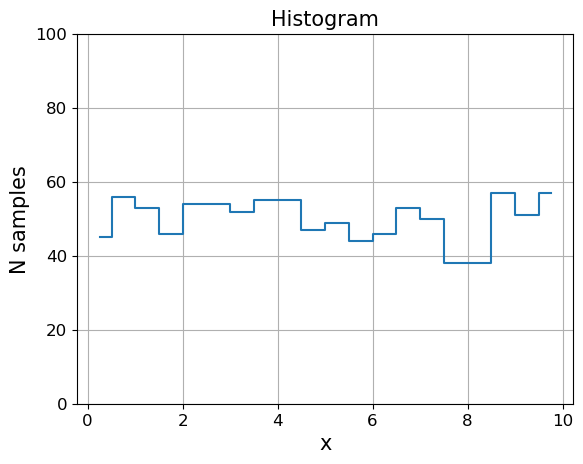

In [2]:
#randomly choose 1000 events from 0 and 10
np.random.seed(0)#makes random numbers stay the same between the run
bkg = np.random.uniform(0,10,1000)
#randomly choose 1000 events using normal distribution with mean 0, standard deviation 1
#bkg = np.random.normal(0,1,1000)
nbins=20
histy, bin_edges = np.histogram(bkg, bins=20)
#histy contains data points corresponding to each bin
#bin_edges contain the values corresponding to edges. 20 bins will have 21 bin edges
bin_centres = 0.5*(bin_edges[1:] + bin_edges[:-1])
#bin_edges[1:] contains binedges from second edge(upper edge) to last edge. bin_edges[:-1] contains bin edges from 
#first edge to second last edge. Adding them pair the lower edge value with corresponding upper edge. Taking avg
#of it will give the centre point of each bin
plt.plot(bin_centres, histy, drawstyle = "steps-mid")
#plt.hist(bkg, bins=nbins, histtype="step")
plt.ylim(0,100)
integral = np.sum(histy)
print(integral)

plt.title("Histogram", fontsize=15)
plt.xlabel("x", fontsize = 15)
plt.ylabel("N samples", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid()
plt.show()

# Sampling events

In [ ]:
bkg1 = np.random.uniform(0, 10, 10000)
bkg2 = np.random.uniform(0, 10, 10000)
data = bkg1 + bkg2
integral = len(data)

def getHist(data):
    histy, bin_edges = np.histogram(data, bins=100)
    bin_centres = 0.5*(bin_edges[1:]+bin_edges[:-1])
    return(histy, bin_edges, bin_centres)

def plotData(data):
    histy, bin_edges, bin_centres = getHist(data)
    plt.plot(bin_centres, histy, drawstyle="steps-mid")
    
    plt.xlabel("X", fontsize= "15")
    plt.ylabel("N samples", fontsize = "15")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)    
    plt.show()

def plotDataNormalised(data):
    histy, bin_edges, bin_centres = getHist(data)
    integral = len(data)
    norm_histy = histy/integral 
    plt.plot(bin_centres, norm_histy, drawstyle="steps-mid")
    plt.xlabel("X", fontsize=15)
    plt.ylabel("relative probabilities", fontsize = 15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
plotData(data)
plotDataNormalised(data)

## Probability Distribution Function(PDF)


In [16]:
xmin = 2
xmax = 5
bkg = np.random.uniform(0, 10, 10000)

prob = 0
total = 0
for x in bkg:
    total +=1
    if x>xmin and x<xmax:
        prob +=1
print("The probability that we are between a and b is ", prob/total, "and the true probability is ", (xmax-xmin)/10)

The probability that we are between a and b is  0.3008 and the true probability is  0.3


## Cumulative Distribution Function(CDF)

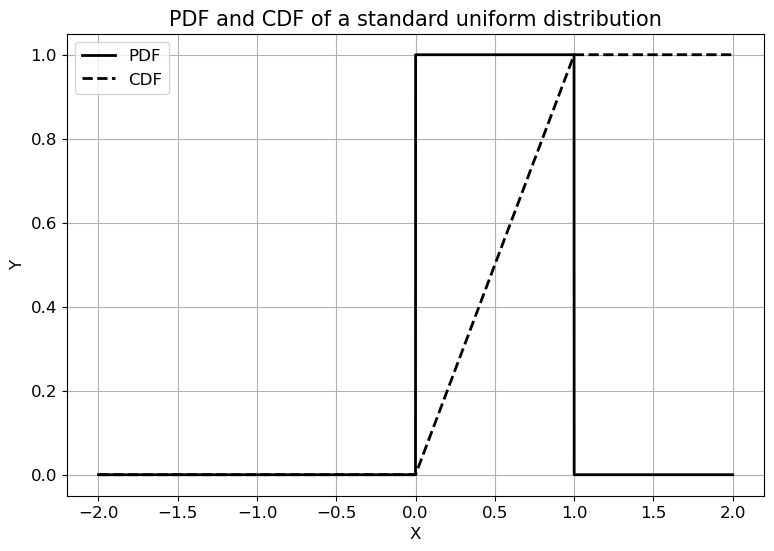

In [22]:
def plot_pdf_cdf_uniform(x):
    fig, ax = plt.subplots(figsize = (9,6))
    #plot data
    ax.plot(x, stats.uniform.pdf(x), "k-", lw=2, label= "PDF")
    #k means black line - means solid line, -- means dotted line, lw means linewidth 
    ax.plot(x, stats.uniform.cdf(x), "k--", lw=2, label="CDF")
    
    plt.title("PDF and CDF of a standard uniform distribution", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel("X",fontsize=12)
    plt.ylabel("Y", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.show()
    
x = np.linspace(-2,2,10000)
plot_pdf_cdf_uniform(x)




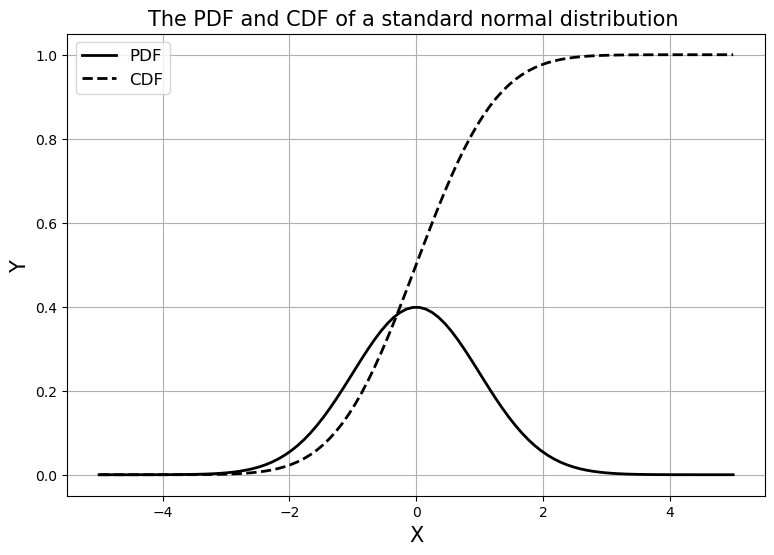

In [3]:
def plot_pdf_cdf_normal(x):
    fig, ax = plt.subplots(figsize=(9,6))
    ax.plot(x, stats.norm.pdf(x), 'k-',lw=2, label="PDF")
    ax.plot(x, stats.norm.cdf(x), 'k--', lw=2, label="CDF")
    plt.title("The PDF and CDF of a standard normal distribution ", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel("X", fontsize=15)
    plt.ylabel("Y", fontsize=15)
    plt.grid()
    plt.show()
  

x = np.linspace(-5, 5, 100)
plot_pdf_cdf_normal(x)

## Mean and Variance

In [4]:
samples = 10000
bkg = np.random.uniform(0,10, samples)

mean=0
prob = 1./samples 
#so that the probability of selecting any sample will be equal
for x in bkg:
    mean += x*prob
print("mean:", mean)

var = 0
for x in bkg:
    var += ((x-mean)**2)*prob
print("variance:", var)

print("The intrinsic mean is ", bkg.mean()," variance is ", bkg.var())

mean: 5.0590957735039614
variance: 8.318263795449223
The intrinsic mean is  5.059095773503966  variance is  8.31826379544923


### Calculate analytically the mean and variance for a uniform distribution in the following ranges:

(a) 0 to 2
(b) 0 to 5
(c) 0 to 10
(d) 0 to 20

In [18]:
sample_list = [np.random.uniform(0,upper,1000) for upper in[2,5,10,20]]

mean_var = [(np.mean(sample), np.var(sample)) for sample in sample_list]
#using tuples, first value is mean and the second value is sample

for meann, variance in mean_var:
    print(f"mean:{mean}, variance:{variance}")


mean:2.4989923335086197, variance:0.3322666508379466
mean:2.4989923335086197, variance:2.132558530222672
mean:2.4989923335086197, variance:8.281302736964472
mean:2.4989923335086197, variance:32.8740903897479


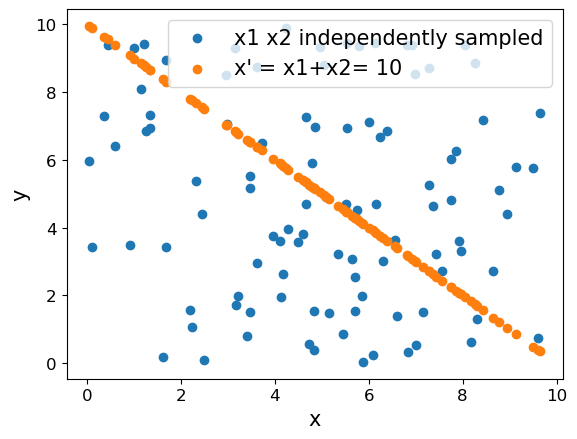

In [2]:
bkg1 = np.random.uniform(0,10,100)
bkg2 = np.random.uniform(0,10,100)

data = bkg1 + bkg2
val= 10- bkg1

plt.scatter(bkg1, bkg2, label="x1 x2 independently sampled")
plt.scatter(bkg1, val, label="x' = x1+x2= 10")

plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Summing of two distributions
 - adding two normal distributions to get a resultant new distribution to see how it looks like
 -

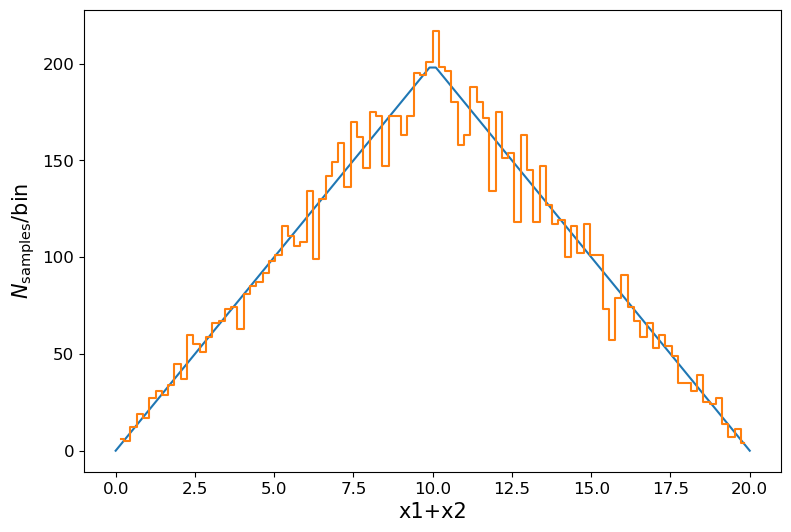

In [4]:
nsamples = 10000
bkg1 = np.random.uniform(0,10, nsamples)
bkg2 = np.random.uniform(0, 10, nsamples)
data = bkg1 + bkg2
nbins=100

histy, bin_edges = np.histogram(data, bins=nbins)
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])

def function(ix, ntotal=nsamples, inbins=nbins):
    if ix<10:
        return ntotal*(20/inbins)*(ix/100)
    else:
        return ntotal*(20/inbins)*(20-ix/100)
def functionnp(ix,ntot=nsamples,inbins=nbins):#note the norm is for n bins over 0-20
    return np.where(ix < 10,ntot*(20/inbins)*(ix/100),ntot*(20/inbins)*(20-ix)/100 )

#We need to evaluate the function, so we do it like this
x = np.linspace(start=0, stop=20, num=100)
#this list(map) is just a trick to run this function on all elements in the array
#y = np.array(list(map(function, x)))
y = functionnp(x) #this just uses numpy

#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(9,6))

#plot data
plt.plot(x, y,label='analytic PDF')
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

#plot labels and style
plt.xlabel('x1+x2', fontsize=15) #Label x
plt.ylabel('$N_\mathrm{samples}$/bin', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


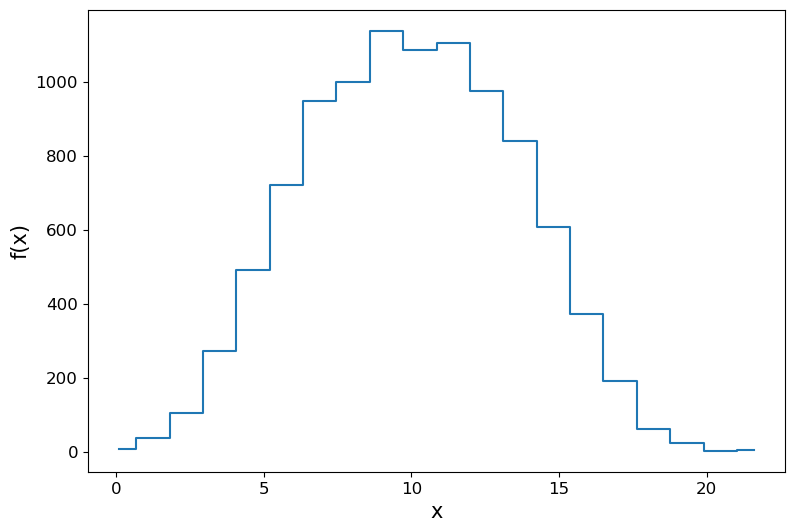

In [5]:
#Sample something crazy
bkg1 = np.random.uniform(0,10, 10000) # a random like before
bkg2 = np.random.normal (5,2 , 10000) # a gaussian distribution centered about 2 with width 5
data = bkg1+bkg2


#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(9,6))

#plot data and axes limits
histy, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#ax.set_ylim([0,150])

#plot labels and style
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('f(x)', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


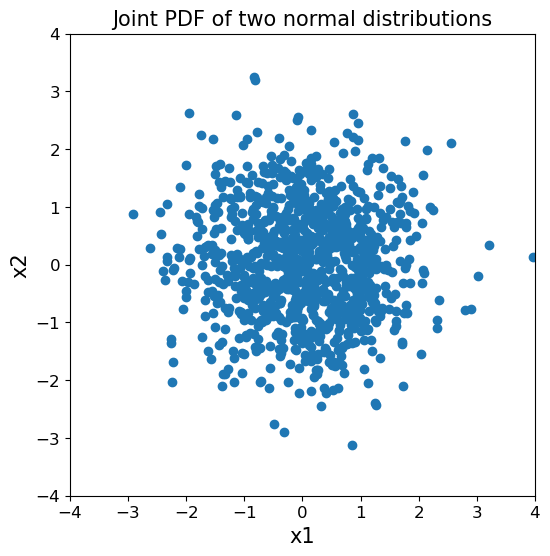

In [6]:
nsamples=1000
mu=0
sigma=1
x1 = np.random.normal(mu,sigma, nsamples)
x2 = np.random.normal(mu,sigma, nsamples)

#plotting-------------------
#plot size
fig, ax = plt.subplots(figsize=(6,6)) #a square plot size is more useful for this data

#plot data and axes limits
plt.scatter(x1,x2,)
plt.xlim(-4,4)
plt.ylim(-4,4)

#plot labels and style
plt.title("Joint PDF of two normal distributions", fontsize=15)
plt.xlabel('x1', fontsize=15) #Label x
plt.ylabel('x2', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\San\AppData\Local\Temp\ipykernel_14292\2601323836.py:9: RuntimeWarning: Mean of empty slice.
  return sample.mean(),sample.std()
C:\Users\San\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\San\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\San\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\San\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


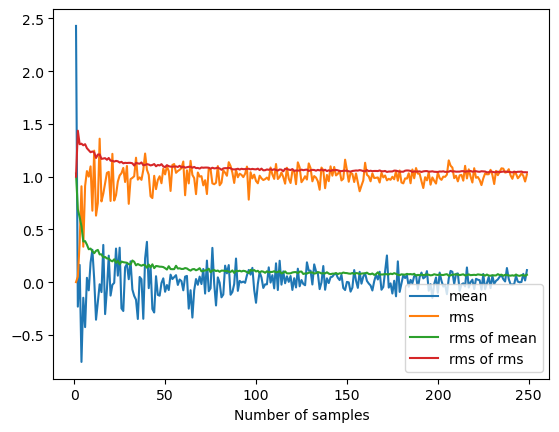

In [7]:
#>>>RUN: L1.6-runcell02

import math

#define a function that samples a normal distribution N times and then returns mean and root mean-square rms 
#(also known as standard deviation, the square root of variance)
def sample(iN,imean,istdev):
    sample = np.random.normal(imean,istdev,iN)
    return sample.mean(),sample.std()

#This function runs 100 tests where we sample N times, we call these toys
def meansample(iN,imean,istdev):
    ntoys=100
    allmeans=np.array([])
    allrmses=np.array([])
    for i0 in range(ntoys):
        pMean,pRMS=sample(iN,imean,istdev)
        allmeans=np.append(allmeans,pMean)
        allrmses=np.append(allrmses,pRMS)
    return allmeans.std(),allrmses.std()


def get_sim_mean_rms(isamples,imean,istdev):
  nvar=np.array([])
  mean=np.array([])
  rms=np.array([])

  distmean=np.array([])
  distrms=np.array([])


  #Now we iterate from 1 to 250 in sampling and compute mean and RMS
  for i0 in range(isamples):
      nvar = np.append(nvar,i0)

      #Sample just once 
      pMean,pRMS=sample(i0,imean,istdev)
      distmean = np.append(distmean,pMean)
      distrms  = np.append(distrms,pRMS)

      #sample many times
      pMean,pRMS=meansample(i0,imean,istdev)
      mean = np.append(mean,pMean)
      rms  = np.append(rms,pRMS)

  return nvar, distmean, distrms, mean, rms


isamples,imean,istdev = [250,0,1]
nvar, distmean, distrms, mean, rms = get_sim_mean_rms(isamples,imean,istdev)


# plt.plot(nvar,funcmean,'--',label='func rms of mean')
# plt.plot(nvar,funcrms,'--',label='func rms of rms')
plt.plot(nvar,distmean,label='mean')
plt.plot(nvar,distrms,label='rms')
plt.plot(nvar,mean,label='rms of mean')
plt.plot(nvar,rms + np.ones(len(rms)),label='rms of rms') # Add 1 to the rms to separate these two quantities in the plot
plt.legend(loc='lower right')
plt.xlabel("Number of samples")
plt.show()


# Binomial Distribution 

In [3]:
#using combination function
print(" 4 choose 2", comb(4,2), "3 choose 2",comb(3,2))

#for p=0.5, what is the probability of 3 heads out of 10 draws?
def prob(p=0.5, nheads=3, ntotal=10):
    phead = np.power(p,nheads)
    ptail = np.power(1-p, ntotal-nheads)
    combs = comb(ntotal,nheads)
    return combs*phead*ptail
print("The probability of getting 3 heads out of 10 draws is ",prob(nheads=3,ntotal=10))

 4 choose 2 6.0 3 choose 2 3.0
The probability of getting 3 heads out of 10 draws is  0.1171875


norm calculated: 0.9999999999999996 expected value calculated: 7.5000000000000036 variance calculated 5.625
norm: 1.000000, expectation: 7.5 Var: 5.625


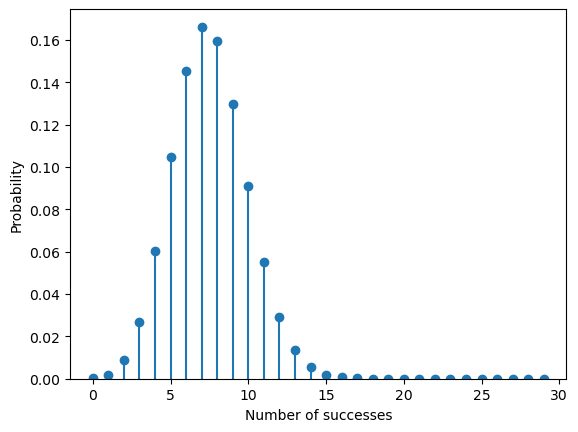

In [4]:
n = 30
p = 0.25
#binomial distribution is discrete so use pmf(probability mass function) instead of pdf
k = np.arange(0,n)
binomial = stats.binom.pmf(k,n,p)
#prob of getting k successes in n trial where each trial has the prop of success = p
norm = 0
exp = 0
var = 0
for i0 in range(n):
    norm+= stats.binom.pmf(i0,n,p)
    exp+= i0*stats.binom.pmf(i0,n,p)
for i0 in range(n):
    pVal = stats.binom.pmf(i0, n, p)
    var+= ((i0-exp/norm)**2)*pVal

print("norm calculated:",norm,"expected value calculated:",exp/norm,"variance calculated",var/norm)
#Now let's check with the expectation
print("norm: 1.000000, expectation:",n*p,"Var:",n*p*(1-p))

plt.plot(k, binomial, 'o') #plots k on x, binomial on y and each point will be circles
plt.vlines(k, 0, binomial) #vertical lines with k as x, starting 0 across binomial y values
plt.ylim(bottom = 0) #makes sure all the values start from y =0 

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

## Fast Ray Burst(FRB)


In [5]:
def prob(nobs=2, ndays=1, p=19/365):
    return stats.binom.pmf(nobs,ndays, p)
print("2 observation in 1 day",prob(nobs=2,ndays=1))
print("2 observation in 2 days",prob(2,2))
print("2 observation in 7 days",prob(nobs=2, ndays=7))
print("19 observation in 365 days",prob(nobs=19,ndays=365))

2 observation in 1 day 0.0
2 observation in 2 days 0.0027097016325764683
2 observation in 7 days 0.04355689764465313
19 observation in 365 days 0.0935904593189704


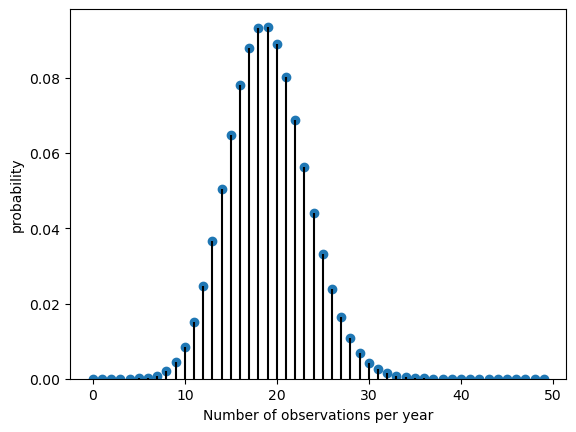

In [6]:
p = 19/365
n = 365
k = np.arange(0, 50)
binomial = stats.binom.pmf(k, n, p)

def plotBinomial(iX, iBinomial, label ="Binomial", color="black"):
    plt.plot(iX, iBinomial, 'o')
    plt.vlines(iX, 0, iBinomial, label=label, color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("probability")
    
plotBinomial(k, binomial)

The CDF of getting 19 successes is  0.5606290918165597


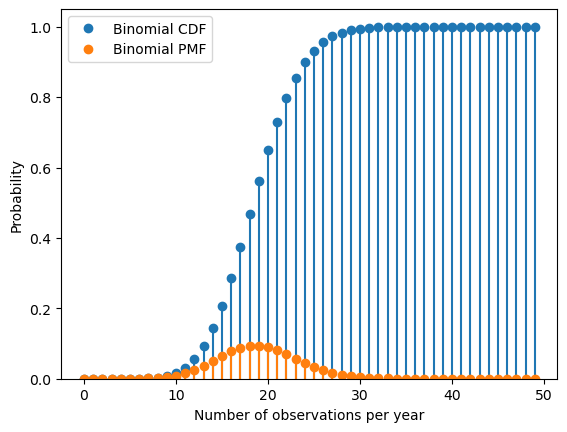

mean 18.999999980557313 standard deviation 4.243931938945087


In [7]:
p = 19/365
n = 365
k = np.arange(0,50)
binomial_pdf = stats.binom.pmf(k,n,p)
binomial_cdf = stats.binom.cdf(k,n,p)
print("The CDF of getting 19 successes is ",stats.binom.cdf(19,n,p))
#cdf is the probability of getting 19 or fewer successes.
plt.plot(k, binomial_cdf, 'o', label="Binomial CDF")
plt.vlines(k,0,binomial_cdf, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.plot(k, binomial_pdf, 'o', label="Binomial PMF")
plt.vlines(k,0,binomial_pdf,color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.xlabel("Number of observations per year")
plt.ylabel("Probability")
plt.legend()
plt.show()

mean = np.average(k, weights=binomial)
variance = np.average((k-mean)**2, weights=binomial)
print("mean",mean,"standard deviation",np.sqrt(variance))

# Poisson Distribution

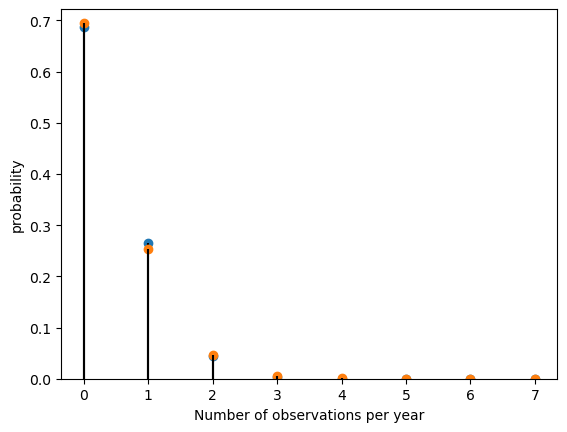

ValueError: x and y must have same first dimension, but have shapes (38,) and (8,)

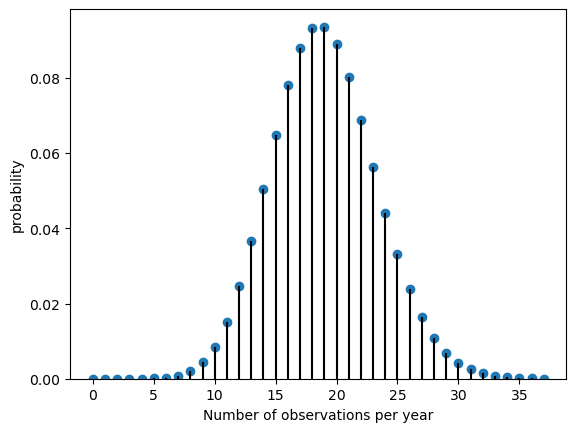

In [8]:
def plotWeekYear(p):
    n = 7
    k = np.arange(0,n+1)
    binomial_week = stats.binom.pmf(k,n,p)
    poisson_week = stats.poisson.pmf(k,n*p)
    plotBinomial(k,binomial_week)
    plotBinomial(k,poisson_week)
    plt.show()
    
    n = 365
    k = np.arange(0,2*n*p)
    binomial_year = stats.binom.pmf(k,n,p)
    poisson_year = stats.poisson.pmf(k,n*p)
    plotBinomial(k, binomial_year)
    plotBinomial(k, poisson_week)
    plt.show()
    
p=19/365
plotWeekYear(p)

In [ ]:
def plotWeekYear(p, title=""):
    n=7
    k=np.arange(0,n+1)
    binomial_Week= stats.binom.pmf(k,n,p)
    poisson_Week= stats.poisson.pmf(k,n*p) #lambda is n*p
    plt.title(title)
    pltBinomial(k,binomial_Week, label="Binomial pmf",color="blue")
    pltBinomial(k,poisson_Week, label="Poisson pmf",color="pink")
    plt.legend(loc="upper right")
    plt.xlabel("Number of observations per week")
    plt.show()
    
    n=365
    k=np.arange(0,2*n*p)
    binomial_year= stats.binom.pmf(k,n,p)
    poisson_year= stats.poisson.pmf(k,n*p)
    plotBinomial(k,binomial_year, label="Binomial pmf",color="blue")
    plotBinomial(k,poisson_year, label="Poisson pmf", color="pink")
    plt.legend(loc="upper right")
    plt.show()
    
    average = np.average(k, weights=binomial_year)
    variance = np.average((k-average)**2,weights=binomial_year)
    print("Yearly binomial mean is ",average, "and standard deviation is",np.sqrt(variance))
    
    average = np.average(k, weights= poisson_year)
    variance = np.average((k-average)**2, weights = poisson_year)
    print("Yearly poisson mean is",average,"and standard distribution is",np.sqrt(variance))
    print()
    
p=19/365
plotWeekYear(p, title="Probability of observing FRB")

p=200/365
plotWeekYear(p, title="Probability of experiencing sunny days")
    

In [ ]:
#>>>RUN: L2.3-runcell01

#Let's make a function for plotting
def plotWeekYear(p, title=''):
    #Week comparison
    n=7
    k=np.arange(0,n+1)
    binomial_week=stats.binom.pmf(k,n,p)
    poisson_week=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.title(title)
    plotBinomial(k,binomial_week,label='Binomial',color='blue')
    plotBinomial(k,poisson_week,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.xlabel('number of observations per week')
    plt.show()

    n=365
    k=np.arange(0,2*p*n)
    binomial_year=stats.binom.pmf(k,n,p)
    poisson_year=stats.poisson.pmf(k,n*p)#note we give lambda=n*p
    plt.title(title)
    plotBinomial(k,binomial_year,label='Binomial',color='blue')
    plotBinomial(k,poisson_year,label='Poisson',color='orange')
    plt.legend(loc='upper right')
    plt.show()
    
    average  = np.average(k, weights=binomial_year)
    variance = np.average((k-average)**2, weights=binomial_year)
    print("Yearly Binomial mean:",average,"stddev:",np.sqrt(variance))

    average  = np.average(k, weights=poisson_year)
    variance = np.average((k-average)**2, weights=poisson_year)
    print("Yearly Poisson mean:",average,"stddev:",np.sqrt(variance))
    print()
    
#First FRBs
p=19/365
plotWeekYear(p, title='Probability of Observing FRBs')

#Now let's do sunny days
p=200/365
plotWeekYear(p, title='Probability of Sunny Days in Boston')


    

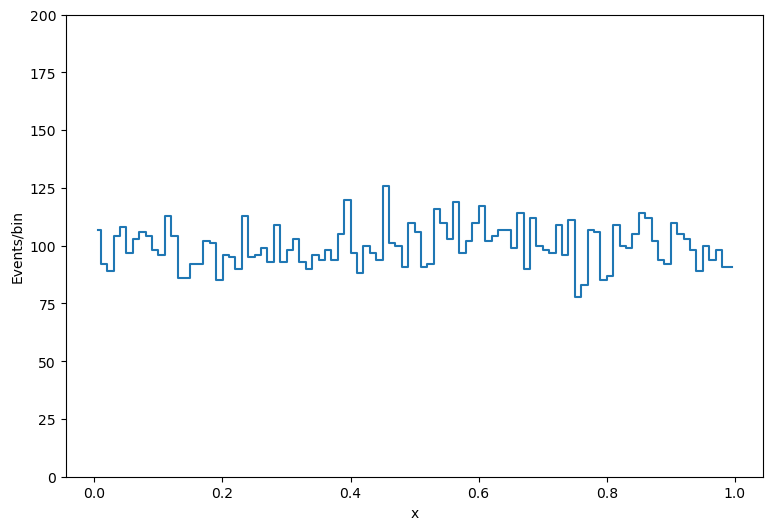

In [3]:
fig, ax = plt.subplots(figsize=(9,6))
N = 10000 #number of events
nbins = 100
sample = np.random.uniform(0,1,N) #creates a random sample of 10000(N) events between 0 and 1

def plotHist(iSample, iNBins): #takes in two variables because to create a histogram we need datapoints and no. of bins
    histy, bin_edges = np.histogram(iSample, bins = iNBins) #np.Histogram function creates a histogram using datapoints and bin numer provided. Histy is an array containing no. of datapoints in each bin. Bin_edges is an array containing edges of bin. 
    #the function divides the range of datapoint into iNBins number of equal width bins. ie 10000 is divided by 100. It will count how many datapoints are in each bin and store the number in histy.
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1]) #[1:] takes all elements from index 1 to last. [:-1] takes all elements from index 0 except the last element
    # adding both arrays will mean, adding first terms of each array-> essentially giving the starting and endpoint of each bin whose half is the bin_Center
    ax.set_ylim([0, 2*N/nbins])
    plt.plot(bin_centers, histy, drawstyle='steps-mid')
    plt.xlabel('x')
    plt.ylabel("Events/bin")
    plt.show()
    return bin_centers, histy
_,_ = plotHist(sample, nbins) #_,_ are placeholder for two values returned by plotHist: bin_centers, histy. 
#since we don't need to use those variables here, we are just not giving them any particular value
#plotHist(sample,nbins)
    

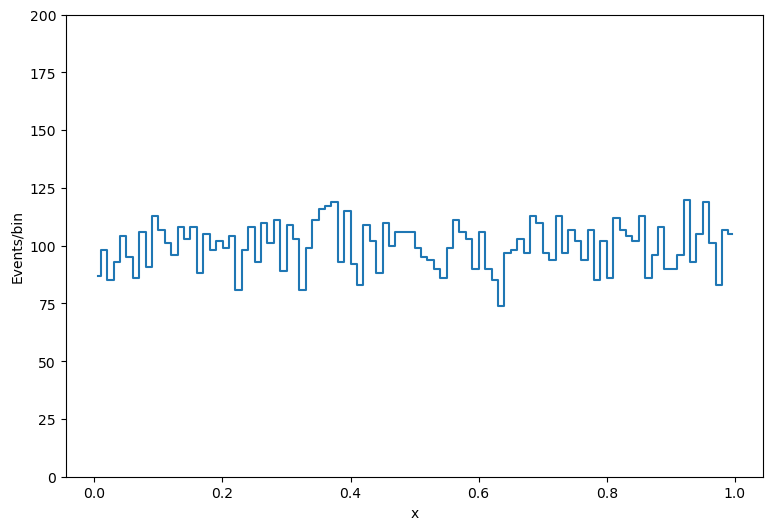

Actual mean: 100.05133333333333 Variance: 95.1962537777778
Poisson mean: 99.99934585710344 Variance: 99.96911275895651


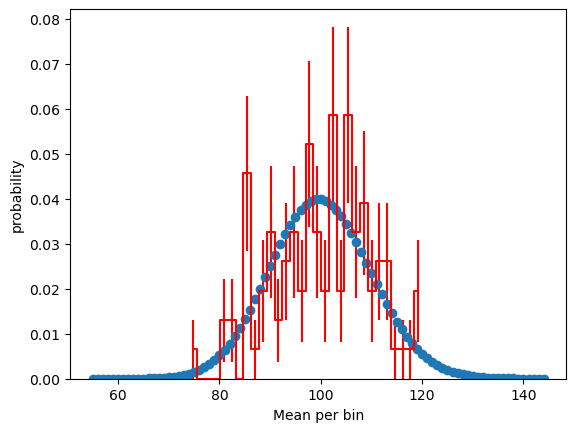

In [4]:
fig, ax = plt.subplots(figsize=(9,6))
N=10000 
#N=1000000 #Try larger N value
nbins=100
sample  = np.random.uniform (0,1,N)
histx, histy = plotHist(sample,nbins)


def normhist(iVars,iNbins=30,iNormalize=True):#iVars is the data points to be plotted, divided into 30 bins, normalise it
    y0, bin_edges = np.histogram(iVars, bins=iNbins) #plots the histogram, y0 contains the no of datapoint within each bin
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0 = 1 #sets normalisation to 1. Used by default if iNormalise condition is not met and the if block i
    if iNormalize:#checks if the initial value of iNormalise is set to true
        norm0=len(iVars)*(bin_edges[-1]-bin_edges[0])/iNbins
#len(iVars)= length of the datapoint= total number of datapoints
        #next terms gives the effective length/range of data divided by number of bins =effective bin length
        #multiplying both will give us the effective length of bins for all the datapoints. How much space or width the 
        #data occupies when distributed into those bins
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,drawstyle = 'steps-mid',c='red')
    return bin_centers,y0,bin_edges

residx,residy,_=normhist(histy)
haverage  = np.average(residx, weights=residy)#weighting the datapoints by the counts of the datapoints
hvariance = np.average((residx-haverage)**2, weights=residy)
print("Actual mean:",haverage,"Variance:",hvariance) 

#Now since we have 100 bins with p=1/100 and we sample 10000 times we have lamb=np= N (1/nbins)
lamb=N/nbins # Number events/bin = 100
k=np.arange(0.55*N/nbins,1.45*N/nbins) #braoder range: 55% to 145% for small set of data
#k=np.arange(0.85*N/nbins,1.15*N/nbins) #adjust range if using larger N #narrower range: 85% to 115% for large set of data
poisson=stats.poisson.pmf(k,lamb)#lambda = n * p = 10000 * (1/100)
paverage  = np.average(k, weights=poisson)
pvariance = np.average((k-paverage)**2, weights=poisson)
print("Poisson mean:",paverage,"Variance:",pvariance)

plt.plot(k,poisson,'o')
# plt.vlines(k,0, poisson)
plt.ylim(bottom=0)

plt.xlabel("Mean per bin")
plt.ylabel("probability")
plt.show()

9.98993900712941


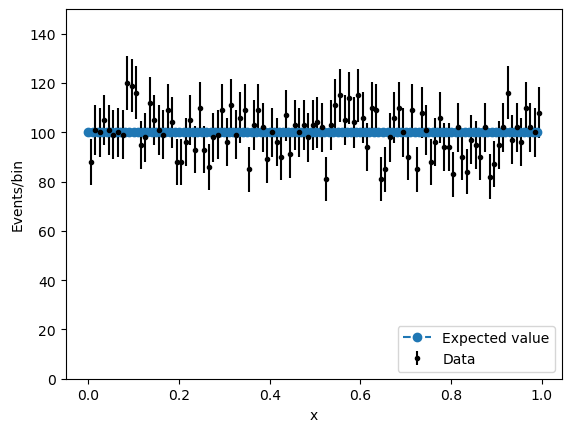

In [9]:
#And so the bins are Poisson fluctuated. This is why when we plot data in a histogram we put error bars 
#Corresponding the Poisson uncertainty in a bin
N = 10000
nbins = 100
sample = np.random.uniform(0,1,N)
histy, bin_edges = np.histogram(sample,bins=nbins)
yerr = np.sqrt(histy) #yerr-> error in y-> vertical error bar. xerr = horizontal error 
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,2*N/nbins])

plt.errorbar(bin_centers, histy, yerr=yerr,marker='.', c="black",linestyle="None",label="Data")
print(np.mean(yerr))

k = np.arange(0,1,0.01)
vals = np.full((100),N/nbins)
plt.plot(k,vals, 'o--',label="Expected value")
plt.ylim(0,150)
plt.xlabel('x')
plt.ylabel("Events/bin")
plt.legend(loc='lower right')
plt.show()



# Gaussian Distribution

summing  1 numbers with mean 5.055288256765533 and standard deviation  2.8735880004544683 2.9186720358747347


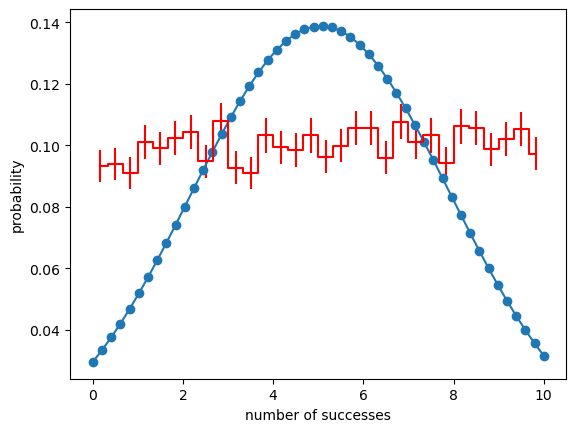

summing  2 numbers with mean 10.043234047726461 and standard deviation  4.048568410829257 4.100133130712791


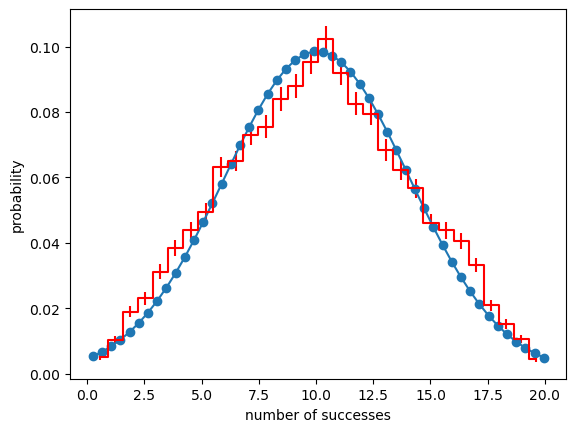

summing  3 numbers with mean 15.033944412340722 and standard deviation  4.967392807927988 5.0113148041135736


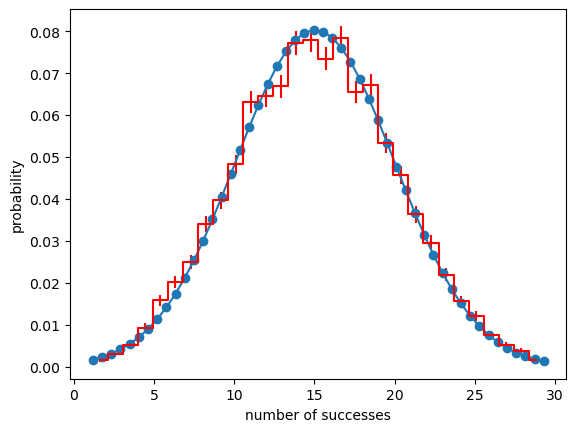

summing  34 numbers with mean 170.1856382659893 and standard deviation  16.74517475300806 16.85088915789864


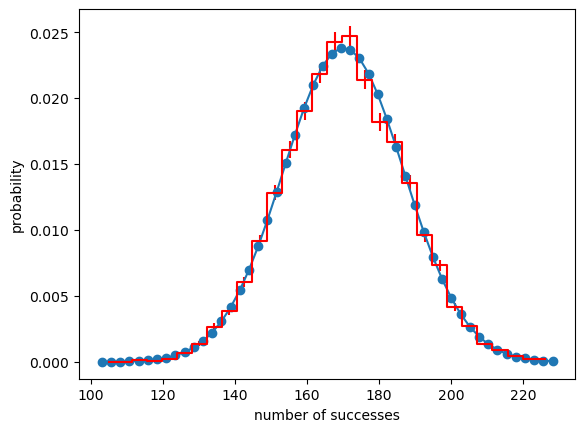

summing  5000 numbers with mean 25001.760124170953 and standard deviation  206.16700161581505 204.13851658560742


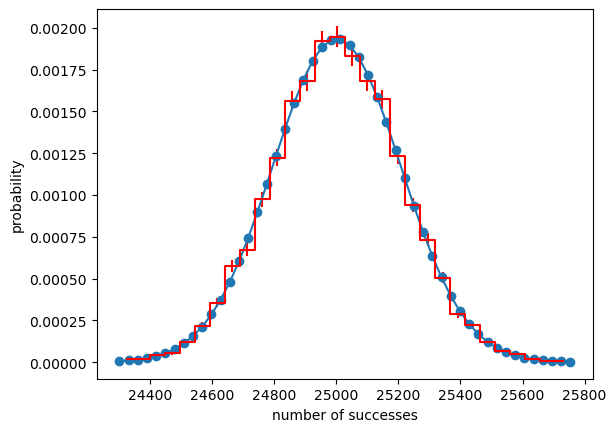

In [16]:
def plotSum(iN):
    ntoys = 10000
    sums = np.array([]) #empty array
    for i0 in range(ntoys):
        pToy = np.random.uniform(0,10,iN) #array pToy=[2,3,4]
        sums = np.append(sums,pToy.sum()) #pToy.sum() = 9+sums = 0+9 =[9]
    _,_,binrange = normhist(sums) #plots gaussian hist
    k = np.linspace(binrange[0],binrange[-1],50) #50 evenly spaced points btw first and last element of binrange
    #k is an array containing the points for plotting
    normal = stats.norm.pdf(k,sums.mean(),sums.std()) #calc pdf of norm dist
    plt.plot(k,normal,'o-')
    plt.xlabel("number of successes")
    plt.ylabel("probability")
    print("summing ",iN,"numbers with mean",sums.mean(), "and standard deviation ",sums.std(),sums.mean()/math.sqrt(3*iN))
    plt.show()
    
plotSum(1)
plotSum(2)
plotSum(3)
plotSum(34)
plotSum(5000)

    
    
        

In [2]:
N = 5000
unif_range = 10
print("standard deviation",np.sqrt(N*unif_range**2/12))

standard deviation 204.1241452319315


## Compare the Poisson distribution to a Gaussian distribution for 
�
λ=3, 15, 100. How do these distributions vary?


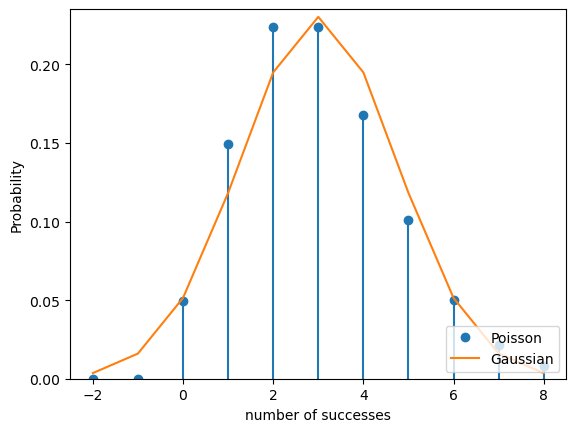

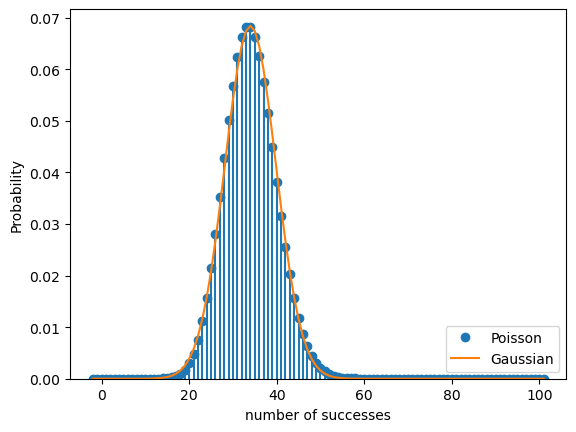

In [3]:
#plotting Gaussian and poisson with same mean and rms
def poisGausPlot(n):
    lamb = n
    k = np.arange(-2, 3.0*n)
    poisson = stats.poisson.pmf(k,lamb)
    normal = stats.norm.pdf(k,n,math.sqrt(n))
    plt.plot(k,poisson,'o',label="Poisson")
    plt.vlines(k,0,poisson,color=plt.gca().lines[-1].get_color())
    plt.ylim(bottom=0)
    plt.plot(k,normal,'-',label="Gaussian")
    plt.xlabel("number of successes")
    plt.ylabel("Probability")
    plt.legend(loc="lower right")
    plt.show()
    
poisGausPlot(3)
poisGausPlot(34)
    
    
    

## Uncertainties in Measurement

means: 10006.173571144032 std deviation 199.03080571959237
predicted mean 10000 standard deviation 200


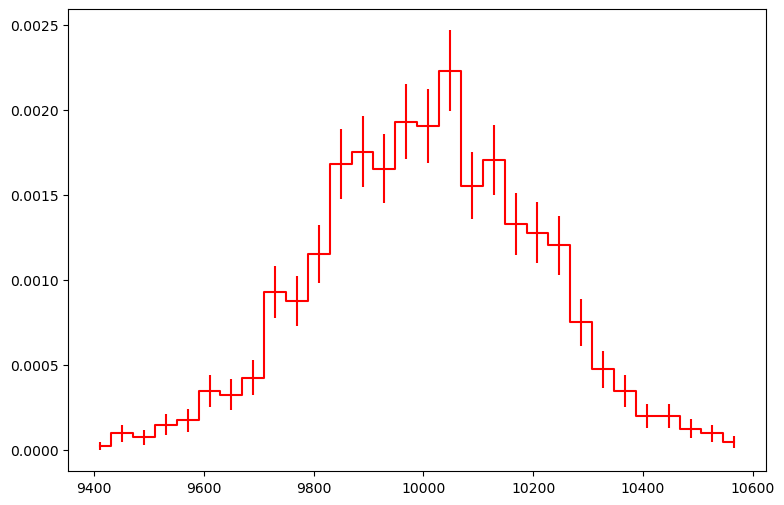

In [10]:
#Now let's say we do a measurement, and the measurement takes an input variable that is varying, 
#and applies a function to it. What is the spread of the function
#setting measurement trials=1000
ntries = 1000 
#creating array with 1000 elements each set to 100
meas = np.full(ntries,100) #creates an array of length ntries and the elements are 100
#creating an array of 1000 random variables sampled from a normal distribution
unc = np.random.normal(0,1,ntries) #creates an array of random variables distributed normally with mean=1, std=1 and ntries number
#add the random uncertainties to the measurement and thus introduce the variability to the measurements
meas = meas + unc

def function(ix):
    return ix**2
#apply function to the smeared measurements(meas) to get the squared values of smeared measurements
outmeas = function(meas)
#create a histogram of the square of smeared measurements
_,_,_ = normhist(outmeas)
#find out the mean and std deviation of smeared measurements
print("means:",outmeas.mean(),"std deviation",outmeas.std())
#find out the mean and std deviation of squared values
print("predicted mean",function(100),"standard deviation",2*100)

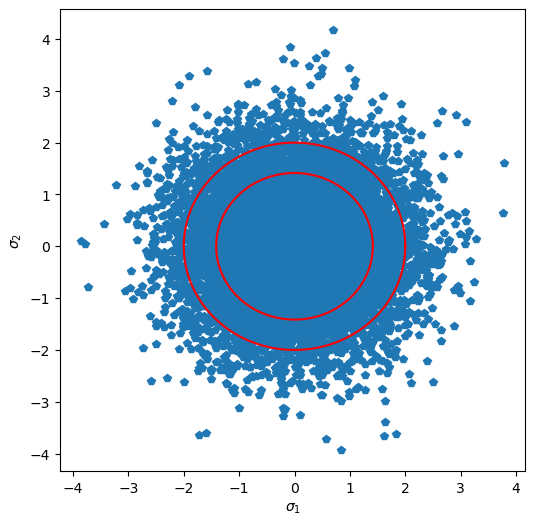

In [9]:
#if we have two uncertainties
ntoys = 10000
err1 = np.array([])
err2 = np.array([])
#create a loop that generates 2 random variables(uncertainties) every time it is run
for i0 in range(ntoys):
    #generate 2 random samples from a normal distribution
    pToy = np.random.normal(0,1,2)
    #add the 2 uncertainties to err1,err2
    err1 = np.append(pToy[0],err1)
    err2 = np.append(pToy[1],err2)
#create an array of 150 angles
angle = np.linspace(0,2*np.pi, 150)
#correct circle
radius = 1*np.sqrt(2)
x = radius*np.cos(angle)
y = radius*np.sin(angle)
#too large circle
radius = 1*2.0
x2 = radius*np.cos(angle)
y2 = radius*np.sin(angle)
plt.rcParams["figure.figsize"]=(6,6)
plt.plot(err1,err2,'p')
plt.plot(x,y,c='r')
plt.plot(x2,y2,c='r')
plt.xlabel("$\sigma_{1}$")
plt.ylabel("$\sigma_{2}$")
plt.show()
plt.rcParams["figure.figsize"]=(9,6)


## Propagating Uncertainties


In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

def load(iName):
    label = iName
    datax = np.array([])
    datay = np.array([])
    datayerr = np.array([])
    #open and read the contents of a cvs file
    with open(label,'r') as csvfile: #with ensures that the file is opened and closed properly. 
        #open(label,r) opens the file with the name label in read mode and this is read as a cvs file
        # as csvfile ensures that the opened file can be traced by this variable name
    #read the data from the cvsfile
    plot = csv.reader(csvfile, delimiter=',') #the csv
    
    